In [1]:
import os
import nibabel as nib
import numpy as np
import nilearn
from nilearn import image
import pandas as pd
from hampel import hampel
import scipy.stats as stats
import matplotlib.pyplot as plt

In [2]:
# data_dir = '/arc/project/st-ipor-1/mkhademi/BOLD5000_2.0/'
# output_dir = '/scratch/st-ipor-1/mkhademi/'
output_dir = 'C:\\Users\\mahkh\\Documents\\'
roi_dir = output_dir + 'image_data\\parcels\\'
subjs = ['CSI1', 'CSI2', 'CSI3', 'CSI4']
roi_names =['lFFA','lOFA','lSTS','lLOC','lPPA','lRSC','lTOS','lEBA','rFFA','rOFA','rSTS','rLOC','rPPA','rRSC','rTOS','rEBA']
roi_voxels = {'lFFA': 531, 'rFFA': 1019, 'lOFA': 211, 'rOFA': 790, 'lSTS': 844, 'rSTS': 2505, 'lLOC': 4971, 'rLOC': 5085,
             'lPPA': 732, 'rPPA': 553, 'lRSC': 1063, 'rRSC': 1741, 'lTOS': 133, 'rTOS': 251, 'lEBA': 2155, 'rEBA': 2413}

In [3]:
sub = subjs[2]
#sub = 'all'
j = 90 # face
dif = nib.load(output_dir + 'image_data\\vis\\dif-' + sub + '-c' + str(j) + '.nii.gz') 
dif = nilearn.image.resample_img(dif, target_shape=(79, 95, 69), target_affine=dif.affine)
dif = np.array(dif.dataobj)
#dif = dif[6:91-6, 7:109-7, 11:91-11]
dif_rois = []
no_roi = np.ones((79, 95, 69), dtype=np.uint8)
for roi_name in roi_names:
    roi = nib.load(roi_dir + roi_name + '.img')
    roi = np.array(roi.dataobj)
    no_roi[np.nonzero(roi)] = 0
    tmp = dif[np.nonzero(roi)]
    tmp[tmp == 0.0] = np.nan
    dif_rois.append(np.nanmedian(tmp))

C:\Users\mahkh\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1119: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,


In [4]:
dif_rois = np.array(dif_rois)
tmp = dif[np.nonzero(no_roi)]
tmp[tmp == 0.0] = np.nan
print('rest' + ':', np.round(np.nanmedian(tmp), 8)) 
for i, roi_name in enumerate(roi_names): 
    print(roi_name + ':', np.round(dif_rois[i], 8))

rest: -0.00041401
lFFA: 0.00097913
lOFA: -0.01783256
lSTS: -0.0039537
lLOC: -0.00365277
lPPA: 0.00039224
lRSC: -0.00093677
lTOS: 0.00155469
lEBA: -0.00751665
rFFA: 0.00239322
rOFA: nan
rSTS: -0.00240691
rLOC: 0.00277211
rPPA: 0.00076311
rRSC: -0.00152131
rTOS: -0.00157136
rEBA: 0.00811107


In [5]:
def get_prop(ig_type):
    igs = nib.load(output_dir + 'image_data\\vis\\' + ig_type + '-' + sub + '-c' + str(j) + '.nii.gz') 
    igs = nilearn.image.resample_img(igs, target_shape=(79, 95, 69), target_affine=igs.affine)
    igs = np.array(igs.dataobj)
    #igs = igs[6:91-6, 7:109-7, 11:91-11]

    tmp = igs.reshape(-1)
    tmp[tmp == 0.0] = np.nan
    tmp = tmp[~np.isnan(tmp)]
    p_pos = np.nanpercentile(tmp, 90)
    print("p_90", p_pos)
    p_neg = np.nanpercentile(tmp, 10)
    print("p_10", p_neg)

    igs_rois = []
    all_prop_pos = []
    all_prop_neg = []
    no_roi = np.ones((79, 95, 69), dtype=np.uint8)
    for roi_name in roi_names:
        roi = nib.load(roi_dir + roi_name + '.img')
        roi = np.array(roi.dataobj)
        no_roi[np.nonzero(roi)] = 0
        tmp = igs[np.nonzero(roi)].copy()
        tmp[tmp == 0.0] = np.nan
        tmp = tmp[~np.isnan(tmp)]
        igs_rois.append(np.nanmedian(tmp))
        prop = 0.0
        for x in tmp:
            if x >= p_pos:
                prop += 1
        if len(tmp) > 0:
            all_prop_pos.append(prop/len(tmp))
        else:
            all_prop_pos.append(0.0)
        prop = 0.0
        for x in tmp:
            if x <= p_neg:
                prop += 1
        if len(tmp) > 0:
            all_prop_neg.append(prop/len(tmp))
        else: 
            all_prop_neg.append(0.0)
    igs_rois = np.array(igs_rois)   
    tmp = igs[np.nonzero(no_roi)].copy()
    tmp[tmp == 0.0] = np.nan
    ##
    prop = 0.0
    for x in tmp:
        if x > p_pos:
            prop += 1
    all_prop_pos.append(prop/len(tmp))
    ##
    print('\n')
    ##
    prop = 0.0
    for x in tmp:
        if x < p_neg:
            prop += 1
    all_prop_neg.append(prop/len(tmp))
    ##
    print('\nMedian IGs:')   
    print('rest' + ':', np.round(np.nanmedian(tmp), 8))
    for i, roi_name in enumerate(roi_names): 
        print(roi_name + ':', np.round(igs_rois[i], 8))
    return all_prop_pos, all_prop_neg

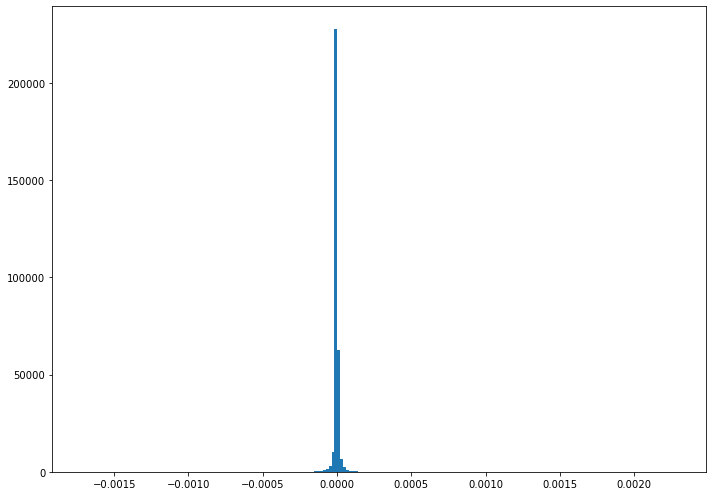

In [6]:
igs = nib.load(output_dir + 'image_data/vis/igs-' + sub + '-c' + str(j) + '.nii.gz') 
igs = nilearn.image.resample_img(igs, target_shape=(79, 95, 69), target_affine=igs.affine)
igs = np.array(igs.dataobj)
#igs = igs[6:91-6, 7:109-7, 11:91-11]

tmp = igs.reshape(-1)
tmp[tmp == 0.0] = np.nan
tmp = tmp[~np.isnan(tmp)]
fig, axs = plt.subplots(1, 1, figsize =(10, 7), tight_layout = True)
axs.hist(tmp, bins=200)
# Show plot
plt.show()

In [7]:
def plot_igs(x_yes, x_no, t, y):
    fig = plt.figure()
    fig.set_size_inches(10, 4)
    plt.rc('font', size=10)
    ax = fig.add_axes([0,0,1,1])
    ax.set_ylabel(y)
    ax.set_xlabel('Brain ROIs')
    ax.set_title(sub + ': Face ' + t)
    x_pos = np.arange(len(roi_names)+1)*5
    ax.bar(x_pos, x_yes, align='center', color='blue', alpha=0.8, ecolor='black', capsize=10, width=2)
    ax.bar(x_pos+2, x_no, align='center', color='red', alpha=0.8, ecolor='black', capsize=10, width=2)
    ax.set_xticks(x_pos+1)
    ax.set_xticklabels(roi_names +['Rest'])
    plt.show()

p_90 8.676014658703934e-06
p_10 -8.473736670566723e-06



Median IGs:
rest: 0.0
lFFA: 5.9e-07
lOFA: 5e-08
lSTS: 1.15e-06
lLOC: 3e-08
lPPA: 1.33e-06
lRSC: -1.6e-07
lTOS: -3.31e-06
lEBA: 5.2e-07
rFFA: -0.0
rOFA: -0.0
rSTS: 0.0
rLOC: 0.0
rPPA: -1.53e-06
rRSC: 2e-08
rTOS: -0.0
rEBA: 0.0
p_90 8.985687054519076e-06
p_10 -1.0366378592152613e-05



Median IGs:
rest: -0.0
lFFA: 5.3e-07
lOFA: 1e-08
lSTS: 9.1e-07
lLOC: 0.0
lPPA: 9.5e-07
lRSC: -5.5e-07
lTOS: -4.49e-06
lEBA: 7e-07
rFFA: -1e-08
rOFA: -0.0
rSTS: 0.0
rLOC: 0.0
rPPA: -2.62e-06
rRSC: -6.4e-07
rTOS: -0.0
rEBA: 0.0


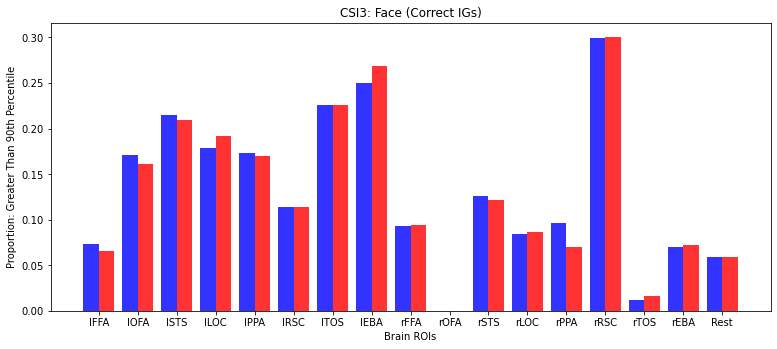

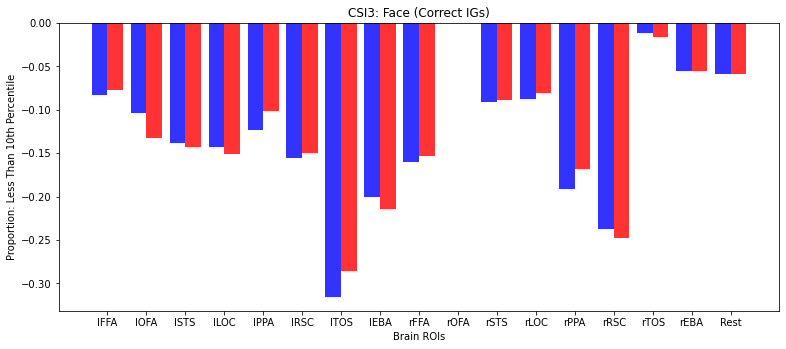

In [8]:
#all_prop_pos, all_prop_neg = get_prop(ig_type='igs')
#plot_igs(all_prop_pos, '(Correct IGs - ALL)', 'Proportion: Greater Than 90th Percentile')
#plot_igs(all_prop_neg, '(All Correct IGs)', 'Proportion: Less Than 10th Percentile')

all_prop_pos_yes, all_prop_neg_yes = get_prop(ig_type='igs-p')
all_prop_pos_no, all_prop_neg_no = get_prop(ig_type='igs-n')
plot_igs(all_prop_pos_yes, all_prop_pos_no, '(Correct IGs)', 'Proportion: Greater Than 90th Percentile')
plot_igs(-np.array(all_prop_neg_yes), -np.array(all_prop_neg_no), '(Correct IGs)', 'Proportion: Less Than 10th Percentile')

